# COMP5318 Assignment 2: Image Classification

### Group number: A2 Group 112, SID1: 520074642 , SID2: 520076163  

This notebook includes the code to load the Fashion-MNIST dataset using Keras, and a skeleton for the main sections that should be included in the notebook. Please see the assignment specification for more detail. You may wish to add extra subsections where appropriate. 

Please focus on making your code clear, with appropriate variable names and whitespace. Include comments and markdown text to aid the readability of your code where relevant.

## Setup and dependencies
Please use this section to list and set up all your required libraries/dependencies and your plotting environment. 

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
from itertools import product
from keras import optimizers
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

## 1. Data loading, preprocessing, and exploration
We have included the code to load the dataset below. Please proceed with your data exploration and preprocessing steps, including creating any relevant data subsets required. The documentation for the data loading function can be accessed [here](https://keras.io/api/datasets/fashion_mnist/).

In [3]:
# Load the Fashion-MNIST dataset training and test sets as numpy arrays
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
# An ordered list of the class names
class_names = ["T-shirt/top",
               "Trouser",
               "Pullover",
               "Dress",
               "Coat",
               "Sandal",
               "Shirt",
               "Sneaker",
               "Bag",
               "Ankle boot"
              ]

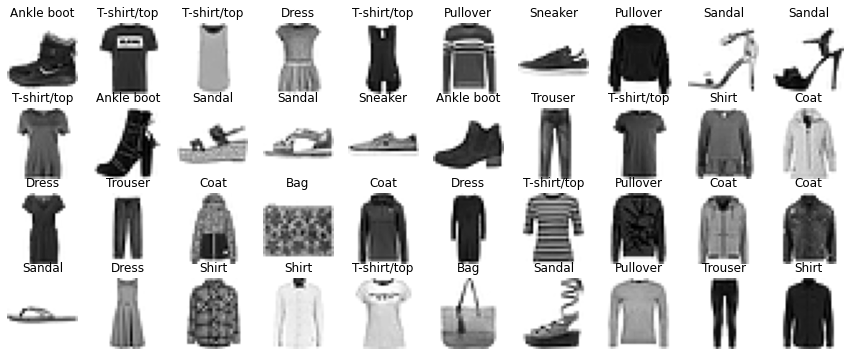

In [5]:
# Show part of the Fashion_MNIST dataset
def plot_examples(data, label, n_rows=4, n_cols=10):
    
    # Size figure depending on the size of the grid
    plt.figure(figsize=(n_cols * 1.5, n_rows * 1.5))
    
    for row in range(n_rows):
        for col in range(n_cols):
            
            # Get next index of image
            index = n_cols * row + col
            
            # Plot the image at appropriate place in grid
            plt.subplot(n_rows, n_cols, index + 1).set_title(class_names[label[index]])
            plt.imshow(data[index], cmap="binary")
            plt.axis('off')
            
    plt.savefig('figure_1')
    plt.show()
    
plot_examples(X_train,y_train)

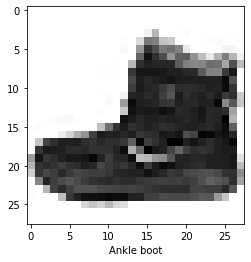

In [6]:
# Show the first data of Fashion_MNIST dataset
plt.imshow(X_train[0], cmap="binary")
plt.xlabel(class_names[y_train[0]])
plt.savefig('figure_2')
plt.show()

In [7]:
# Normalize the Fashion_MNIST dataset
X_train = X_train / 255.
X_test = X_test / 255.

In [8]:
# Convert the Fashion_MNIST dataset into a two-dimensional array for use in the random forest algorithm
X_train_rf = X_train.reshape(X_train.shape[0], 28*28)
X_test_rf = X_test.reshape(X_test.shape[0], 28*28)
y_train_rf = y_train

print(f"New shape of X_train_rf: {X_train_rf.shape}")
print(f"New shape of X_test_rf: {X_test_rf.shape}")

New shape of X_train_rf: (60000, 784)
New shape of X_test_rf: (10000, 784)


In [9]:
# Dividing the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.9)

In [10]:
# Add an extra dimension to our data
X_train_cnn = np.expand_dims(X_train, -1)
X_valid_cnn = np.expand_dims(X_valid, -1)
X_test_cnn = np.expand_dims(X_test, -1)

print(f"New shape of X_train_cnn: {X_train_cnn.shape}")
print(f"New shape of X_valid_cnn: {X_valid_cnn.shape}")

New shape of X_train_cnn: (54000, 28, 28, 1)
New shape of X_valid_cnn: (6000, 28, 28, 1)


## 2. Algorithm design and setup

### Algorithm of choice from first six weeks of course

In [11]:
from sklearn.ensemble import RandomForestClassifier
# Create the Random Forest classifier and train the data
rf = RandomForestClassifier()
rf.fit(X_train_rf, y_train_rf)

# Predict the test set data and get the preliminary accuracy
y_pred = rf.predict(X_test_rf)
accuracy_rf = metrics.accuracy_score(y_test,y_pred)
print('RF accuracy: %.2f%%' % (100 * accuracy_rf))

RF accuracy: 87.71%


### Fully connected neural network

In [12]:
# Create functions for building multilayer perceptron models
def build_mlp(activation_function1, activation_function2, optimizer_lr):

    model = keras.models.Sequential()
    
    # Add the input layer
    model.add(keras.layers.Flatten(input_shape=[28, 28]))
    
    # Add the hidden layers with desired size and activation function
    model.add(keras.layers.Dense(300, activation=activation_function1))
    
    model.add(keras.layers.Dense(100, activation=activation_function2))
        
    # Add the output layer for 10 class classification
    model.add(keras.layers.Dense(10, activation="softmax"))
    
    # Compile optimization functions
    opt = keras.optimizers.SGD(learning_rate=optimizer_lr)
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    
    return model

In [13]:
model = build_mlp('tanh','tanh',5e-2)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1688/1688 [==============================] - 6s 2ms/step - loss: 0.5318 - accuracy: 0.8094 - val_loss: 0.4320 - val_accuracy: 0.8440
Epoch 2/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4088 - accuracy: 0.8508 - val_loss: 0.4556 - val_accuracy: 0.8260
Epoch 3/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3720 - accuracy: 0.8661 - val_loss: 0.3755 - val_accuracy: 0.8593
Epoch 4/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3470 - accuracy: 0.8725 - val_loss: 0.3562 - val_accuracy: 0.8715
Epoch 5/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3303 - accuracy: 0.8794 - val_loss: 0.3464 - val_accuracy: 0.8728
Epoch 6/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3128 - accuracy: 0.8844 - val_loss: 0.3314 - val_accuracy: 0.8797
Epoch 7/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3022 - accuracy: 0.8894 - val_loss: 0.3276 - val_accuracy:

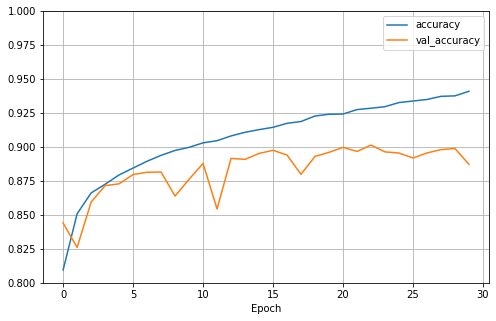

In [15]:
# Convert the history dictionary to a Pandas dataframe and extract the accuracies
accuracies = pd.DataFrame(history.history)[['accuracy', 'val_accuracy']]

# Plot the accuracies
accuracies.plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0.8, 1)
plt.xlabel('Epoch')
plt.savefig('figure_3')
plt.show()

In [16]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy on test data: {accuracy:.4f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.3668 - accuracy: 0.8754
Accuracy on test data: 0.8754


### Convolutional neural network

In [17]:
def build_model(ks, strides, lrs):
    cnn_model = keras.Sequential([
        # Specify the input shape
        keras.Input(shape=(28, 28, 1)),

        # Conv and pool block 1
        keras.layers.Conv2D(filters = 32, kernel_size=(ks, ks), strides=strides, padding="same", activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),

        # Conv and pool block 2
        keras.layers.Conv2D(filters = 64, kernel_size=(ks, ks), strides=strides, padding="same", activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),

        # Flatten and classify using dense output layer
        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(10, activation="softmax"),
    ])
    
    opt = tf.keras.optimizers.Adam(learning_rate=lrs)
    cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return cnn_model

In [18]:
model= build_model(3, 1, 0.01)
history = model.fit(X_train_cnn, y_train, batch_size=128, epochs=100, validation_data=(X_valid_cnn, y_valid))

Epoch 1/100
422/422 [==============================] - 8s 4ms/step - loss: 0.4950 - accuracy: 0.8217 - val_loss: 0.3396 - val_accuracy: 0.8783
Epoch 2/100
422/422 [==============================] - 2s 4ms/step - loss: 0.3719 - accuracy: 0.8677 - val_loss: 0.2965 - val_accuracy: 0.8947
Epoch 3/100
422/422 [==============================] - 2s 4ms/step - loss: 0.3463 - accuracy: 0.8741 - val_loss: 0.2856 - val_accuracy: 0.8967
Epoch 4/100
422/422 [==============================] - 2s 4ms/step - loss: 0.3328 - accuracy: 0.8792 - val_loss: 0.2805 - val_accuracy: 0.9007
Epoch 5/100
422/422 [==============================] - 2s 4ms/step - loss: 0.3230 - accuracy: 0.8819 - val_loss: 0.2664 - val_accuracy: 0.9053
Epoch 6/100
422/422 [==============================] - 2s 4ms/step - loss: 0.3163 - accuracy: 0.8841 - val_loss: 0.2742 - val_accuracy: 0.9037
Epoch 7/100
422/422 [==============================] - 2s 4ms/step - loss: 0.3114 - accuracy: 0.8883 - val_loss: 0.2553 - val_accuracy: 0.9095

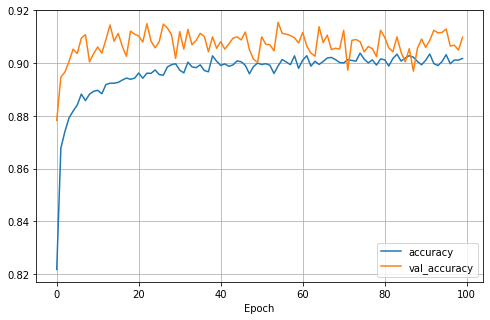

In [19]:
# Convert the history dictionary to a Pandas dataframe and extract the accuracies
accuracies = pd.DataFrame(history.history)[['accuracy', 'val_accuracy']]

# Plot the accuracies
accuracies.plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel('Epoch')
plt.savefig('figure_4')
plt.show()

#From the graph, approximately 30 epochs is optimal, as learning efficiency decreases and does not improve much from thirty onwards.

In [20]:
loss, accuracy = model.evaluate(X_test_cnn, y_test)
print(f"Accuracy on test data: {accuracy:.4f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.3176 - accuracy: 0.8961
Accuracy on test data: 0.8961


## 3. Hyperparameter tuning

### Algorithm of choice from first six weeks of course

In [21]:
# Combine the parameters that need to be tuned
criterion = ['gini', 'entropy', 'log_loss']
n_estimators = [50,100,150,200]
max_leaf_nodes = [3000,4000,5000,None]
param_grid = {"criterion": criterion,
              "n_estimators": n_estimators,
              "max_leaf_nodes":max_leaf_nodes}

# Create the Random Forest classifier
rf = RandomForestClassifier()
# Set estimator for grid search
grid_search_cv = GridSearchCV(rf, param_grid, cv=3, return_train_score=True, verbose=2)
# Import the training set
grid_search_cv.fit(X_train_rf, y_train_rf)
# Save the best params
best_params_rf = grid_search_cv.best_params_

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END criterion=gini, max_leaf_nodes=3000, n_estimators=50; total time=  23.5s
[CV] END criterion=gini, max_leaf_nodes=3000, n_estimators=50; total time=  25.5s
[CV] END criterion=gini, max_leaf_nodes=3000, n_estimators=50; total time=  25.6s
[CV] END criterion=gini, max_leaf_nodes=3000, n_estimators=100; total time=  50.4s
[CV] END criterion=gini, max_leaf_nodes=3000, n_estimators=100; total time=  50.6s
[CV] END criterion=gini, max_leaf_nodes=3000, n_estimators=100; total time=  50.3s
[CV] END criterion=gini, max_leaf_nodes=3000, n_estimators=150; total time= 1.2min
[CV] END criterion=gini, max_leaf_nodes=3000, n_estimators=150; total time= 1.2min
[CV] END criterion=gini, max_leaf_nodes=3000, n_estimators=150; total time= 1.2min
[CV] END criterion=gini, max_leaf_nodes=3000, n_estimators=200; total time= 1.5min
[CV] END criterion=gini, max_leaf_nodes=3000, n_estimators=200; total time= 1.5min
[CV] END criterion=gini, max

In [22]:
print('RF Best params: ',best_params_rf)
print('RF Best scores: ',grid_search_cv.best_score_)

RF Best params:  {'criterion': 'entropy', 'max_leaf_nodes': None, 'n_estimators': 200}
RF Best scores:  0.8823500000000001


### Fully connected neural network

In [23]:
# Multilayer perceptron model without activation function
model_no_activation = build_mlp(None,None,0.1)
history = model_no_activation.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1688/1688 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.0995 - val_loss: nan - val_accuracy: 0.1047
Epoch 2/30
1688/1688 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.0995 - val_loss: nan - val_accuracy: 0.1047
Epoch 3/30
1688/1688 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.0995 - val_loss: nan - val_accuracy: 0.1047
Epoch 4/30
1688/1688 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.0995 - val_loss: nan - val_accuracy: 0.1047
Epoch 5/30
1688/1688 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.0995 - val_loss: nan - val_accuracy: 0.1047
Epoch 6/30
1688/1688 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.0995 - val_loss: nan - val_accuracy: 0.1047
Epoch 7/30
1688/1688 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.0995 - val_loss: nan - val_accuracy: 0.1047
Epoch 8/30
1688/1688 [============

In [24]:
loss, accuracy = model_no_activation.evaluate(X_test, y_test)
print(f"Accuracy on test data: {accuracy:.4f}")

313/313 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.1000
Accuracy on test data: 0.1000


In [25]:
# Wrapping multilayer perceptron models with keras for compatibility with the GridSearchCV
keras_classifier = KerasClassifier(build_mlp,
                                   activation_function1 = "relu",
                                   activation_function2 = "relu",
                                   optimizer_lr = 1e-1
)

# Combine the parameters that need to be tuned
param_grid = {
    "activation_function1": ["relu", "sigmoid", "tanh"],
    "activation_function2": ["relu", "sigmoid", "tanh"],
    "optimizer_lr": [1e-1, 1e-2, 1e-3]
}

# Set estimator for grid search
grid_search_cv = GridSearchCV(keras_classifier, param_grid, cv=3, verbose=2)
# Import the training set
grid_search_cv.fit(X_train, y_train, epochs=30)
# Save the best params
best_params_mlp = grid_search_cv.best_params_

流式输出内容被截断，只能显示最后 5000 行内容。
1125/1125 [==============================] - 2s 2ms/step - loss: 0.2498 - accuracy: 0.9051
Epoch 12/30
1125/1125 [==============================] - 2s 2ms/step - loss: 0.2394 - accuracy: 0.9092
Epoch 13/30
1125/1125 [==============================] - 2s 2ms/step - loss: 0.2311 - accuracy: 0.9117
Epoch 14/30
1125/1125 [==============================] - 2s 2ms/step - loss: 0.2240 - accuracy: 0.9138
Epoch 15/30
1125/1125 [==============================] - 2s 2ms/step - loss: 0.2149 - accuracy: 0.9175
Epoch 16/30
1125/1125 [==============================] - 2s 2ms/step - loss: 0.2101 - accuracy: 0.9206
Epoch 17/30
1125/1125 [==============================] - 2s 2ms/step - loss: 0.2027 - accuracy: 0.9222
Epoch 18/30
1125/1125 [==============================] - 2s 2ms/step - loss: 0.1954 - accuracy: 0.9255
Epoch 19/30
1125/1125 [==============================] - 2s 2ms/step - loss: 0.1917 - accuracy: 0.9268
Epoch 20/30
1125/1125 [==============================] - 2

In [26]:
print('MLP Best params: ',best_params_mlp)
print('MLP Best scores: ',grid_search_cv.best_score_)

MLP Best params:  {'activation_function1': 'relu', 'activation_function2': 'sigmoid', 'optimizer_lr': 0.1}
MLP Best scores:  0.8897777777777778


### Convolutional neural network

In [36]:
# CNN model with default parameter
model_default = build_model(3,1,1e-2)
history = model_no_activation.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1688/1688 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.0995 - val_loss: nan - val_accuracy: 0.1047
Epoch 2/30
1688/1688 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.0995 - val_loss: nan - val_accuracy: 0.1047
Epoch 3/30
1688/1688 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.0995 - val_loss: nan - val_accuracy: 0.1047
Epoch 4/30
1688/1688 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.0995 - val_loss: nan - val_accuracy: 0.1047
Epoch 5/30
1688/1688 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.0995 - val_loss: nan - val_accuracy: 0.1047
Epoch 6/30
1688/1688 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.0995 - val_loss: nan - val_accuracy: 0.1047
Epoch 7/30
1688/1688 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.0995 - val_loss: nan - val_accuracy: 0.1047
Epoch 8/30
1688/1688 [============

In [37]:
loss, accuracy = model_default.evaluate(X_test, y_test)
print(f"Accuracy on test data: {accuracy:.4f}")

313/313 [==============================] - 1s 2ms/step - loss: 2.2963 - accuracy: 0.1124
Accuracy on test data: 0.1124


In [27]:
# Create a KerasClassifier object which works with sklearn grid searches
# We need to pass default values of arguments in build_mlp if we wish to tune them
keras_classifier = KerasClassifier(build_model,
                                   ks=3,
                                   strides=1,
                                   lrs=1e-2,
)

param_grid = {
    "ks": [2, 3, 4],
    "strides": [1, 2, 3],
    "lrs": [1e-2, 1e-3, 5e-3, 5e-4]
}

grid_search_cv = GridSearchCV(keras_classifier, param_grid, cv=3, verbose=2)
grid_search_cv.fit(X_train_cnn, y_train, epochs=30)
best_param_cnn = grid_search_cv.best_params_

流式输出内容被截断，只能显示最后 5000 行内容。
1125/1125 [==============================] - 3s 2ms/step - loss: 0.3039 - accuracy: 0.8919
Epoch 12/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.2980 - accuracy: 0.8926
Epoch 13/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.2897 - accuracy: 0.8961
Epoch 14/30
1125/1125 [==============================] - 3s 2ms/step - loss: 0.2878 - accuracy: 0.8948
Epoch 15/30
1125/1125 [==============================] - 3s 2ms/step - loss: 0.2807 - accuracy: 0.8987
Epoch 16/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.2795 - accuracy: 0.8991
Epoch 17/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.2695 - accuracy: 0.9026
Epoch 18/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.2660 - accuracy: 0.9055
Epoch 19/30
1125/1125 [==============================] - 3s 2ms/step - loss: 0.2643 - accuracy: 0.9059
Epoch 20/30
1125/1125 [==============================] - 3

In [29]:
print('CNN Best params: ',best_param_cnn)
print('CNN Best scores: ',grid_search_cv.best_score_)

CNN Best params:  {'ks': 4, 'lrs': 0.0005, 'strides': 1}
CNN Best scores:  0.922037037037037


## 4. Final models
In this section, please ensure to include cells to train each model with its best hyperparmater combination independently of the hyperparameter tuning cells, i.e. don't rely on the hyperparameter tuning cells having been run.

### Algorithm of choice from first six weeks of course

In [30]:
# Set the model to the optimal hyperparameter result, train it and then predict the accuracy in the test set
rf = RandomForestClassifier(criterion = best_params_rf['criterion'],
                            n_estimators = best_params_rf['n_estimators'],
                            max_leaf_nodes = best_params_rf['max_leaf_nodes'])
rf.fit(X_train_rf, y_train_rf)
y_pred = rf.predict(X_test_rf)
accuracy_rf = metrics.accuracy_score(y_test,y_pred)
print('RF accuracy: %.2f%%' % (100 * accuracy_rf))

RF accuracy: 87.66%


### Fully connected neural network

In [31]:
# Set the model to the optimal hyperparameter result
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation=best_params_mlp['activation_function1']),
    keras.layers.Dense(100, activation=best_params_mlp['activation_function2']),
    keras.layers.Dense(10, activation="softmax")
])
opt = keras.optimizers.SGD(learning_rate=best_params_mlp['optimizer_lr'])
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [32]:
# Train the multilayer perceptron model
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.6253 - accuracy: 0.7829 - val_loss: 0.4438 - val_accuracy: 0.8423
Epoch 2/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4297 - accuracy: 0.8437 - val_loss: 0.4655 - val_accuracy: 0.8207
Epoch 3/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3886 - accuracy: 0.8583 - val_loss: 0.3999 - val_accuracy: 0.8477
Epoch 4/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3638 - accuracy: 0.8670 - val_loss: 0.3769 - val_accuracy: 0.8562
Epoch 5/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3436 - accuracy: 0.8746 - val_loss: 0.3422 - val_accuracy: 0.8762
Epoch 6/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3280 - accuracy: 0.8788 - val_loss: 0.3383 - val_accuracy: 0.8737
Epoch 7/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3129 - accuracy: 0.8847 - val_loss: 0.3452 - val_accuracy:

In [33]:
# Predict the accuracy in the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy on test data: {accuracy:.4f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.3846 - accuracy: 0.8729
Accuracy on test data: 0.8729


### Convolutional neural network

In [34]:
ks = best_param_cnn['ks']
strides = best_param_cnn['strides']
lrs = best_param_cnn['lrs']

In [35]:
cnn_final_model = keras.Sequential([

# Specify the input shape
keras.Input(shape=(28, 28, 1)),

# Conv and pool block 1
keras.layers.Conv2D(filters = 32, kernel_size=(ks, ks), strides=strides, activation='relu'),
keras.layers.MaxPooling2D(pool_size=(2, 2)),

# Conv and pool block 2
keras.layers.Conv2D(filters = 64, kernel_size=(ks, ks), strides=strides, activation='relu'),
keras.layers.MaxPooling2D(pool_size=(2, 2)),

# Flatten and classify using dense output layer
keras.layers.Flatten(),
keras.layers.Dropout(0.5),
keras.layers.Dense(10, activation="softmax"),
])

opt = tf.keras.optimizers.Adam(learning_rate=lrs)

# Compile model with loss, optimiser, and metrics
cnn_final_model.compile(loss='sparse_categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])

# Train the model for 30 epochs with batch size 128
batch_size = 128
epochs = 30
history = cnn_final_model.fit(X_train_cnn, y_train, batch_size=batch_size,
                      epochs=epochs, validation_data=(X_valid_cnn, y_valid))

# Evaluate the classifier on the test data.
loss, accuracy = cnn_final_model.evaluate(X_test_cnn, y_test)
print(f"Accuracy on test data: {accuracy:.4f}")

Epoch 1/30
422/422 [==============================] - 2s 4ms/step - loss: 0.8428 - accuracy: 0.7023 - val_loss: 0.5346 - val_accuracy: 0.8107
Epoch 2/30
422/422 [==============================] - 1s 3ms/step - loss: 0.5345 - accuracy: 0.8066 - val_loss: 0.4577 - val_accuracy: 0.8408
Epoch 3/30
422/422 [==============================] - 1s 3ms/step - loss: 0.4713 - accuracy: 0.8295 - val_loss: 0.4138 - val_accuracy: 0.8487
Epoch 4/30
422/422 [==============================] - 1s 3ms/step - loss: 0.4379 - accuracy: 0.8423 - val_loss: 0.3817 - val_accuracy: 0.8600
Epoch 5/30
422/422 [==============================] - 1s 3ms/step - loss: 0.4091 - accuracy: 0.8542 - val_loss: 0.3711 - val_accuracy: 0.8665
Epoch 6/30
422/422 [==============================] - 1s 3ms/step - loss: 0.3912 - accuracy: 0.8602 - val_loss: 0.3592 - val_accuracy: 0.8738
Epoch 7/30
422/422 [==============================] - 1s 3ms/step - loss: 0.3776 - accuracy: 0.8651 - val_loss: 0.3371 - val_accuracy: 0.8805
Epoch 